In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
lyric_word_freq = pd.read_csv('./lyrics.csv')

In [3]:
freq = lyric_word_freq.groupby("word")['count'].agg(np.sum)

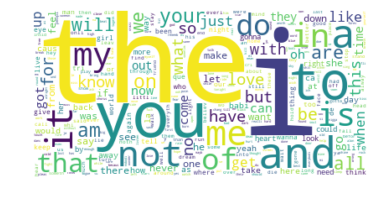

In [4]:
wc = WordCloud(background_color="white", max_words=2000,stopwords=set(STOPWORDS), contour_width=3, contour_color='steelblue').generate_from_frequencies(freq.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Still contains stop words. Remove stop words and plot EDA.

In [5]:
freq_dict = freq.to_dict()

# remove stop words
for stop in set(STOPWORDS):
    if stop in freq_dict.keys():
        freq_dict.pop(stop, None)

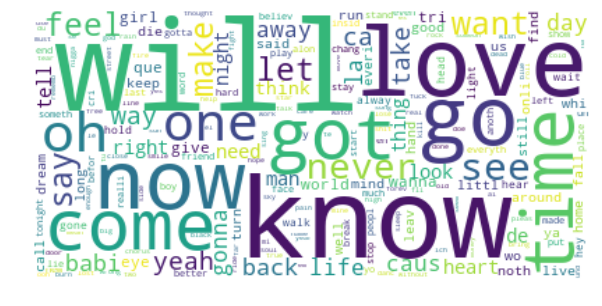

In [6]:
# plot the word cloud
fig, ax = plt.subplots(figsize = (10,5))
wc = WordCloud(background_color="white", max_words=2000, 
               stopwords=set(STOPWORDS), contour_width=3, contour_color='steelblue').generate_from_frequencies(freq_dict)

ax.imshow(wc, interpolation="bilinear", aspect='auto')
ax.axis("off")
plt.show()

In [17]:
# Write to file
wc.to_file("song_text.png")

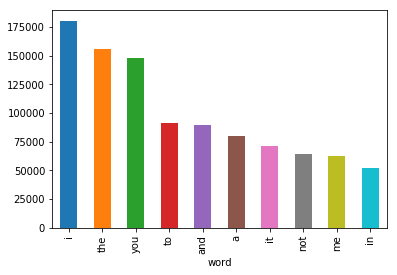

In [23]:
freq.sort_values(ascending=False).head(10).plot(kind='bar')

In [34]:
word_wo_stopwords = pd.DataFrame.from_dict(freq_dict, orient='index')
word_wo_stopwords.head()

,0
&,588
000,59
1,620
10,190
100,32


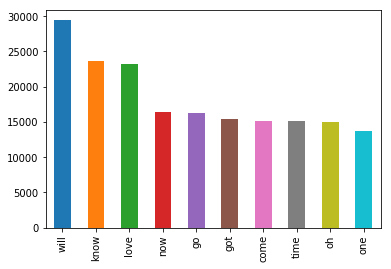

In [39]:
word_wo_stopwords[0].sort_values(ascending=False).head(10).plot(kind='bar')